In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from preprocessor_params_hex import DataProcessingPipeline

from sklearn.feature_selection import SelectKBest, f_regression

In [13]:
df = pd.read_csv(r'/Users/avkoroleva/Downloads/raw_data_parsed_desc_preprocessed_full-3.csv')

In [4]:
df = df.head(5)

In [15]:
process = DataProcessingPipeline(
            df,
            log_needed=False,
            norm_needed=False,
            one_hot_only=False,
            train=True,
            use_hex_features = True
        )
df = process.preprocess_base()

/Users/avkoroleva/thesis/preprocessor_params_hex.py:151: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, sep='\t', header=None, encoding='utf-8')


Радиус 5 км:   0%|          | 0/69439 [00:00<?, ?it/s]

Attempt 1 failed: HTTPSConnectionPool(host='overpass-api.de', port=443): Read timed out. (read timeout=5)
Attempt 1 failed: HTTPSConnectionPool(host='overpass-api.de', port=443): Read timed out. (read timeout=5)
Attempt 1 failed: HTTPSConnectionPool(host='overpass-api.de', port=443): Read timed out. (read timeout=5)
Attempt 1 failed: HTTPSConnectionPool(host='overpass-api.de', port=443): Read timed out. (read timeout=5)
Attempt 1 failed: HTTPSConnectionPool(host='overpass-api.de', port=443): Read timed out. (read timeout=5)
Attempt 1 failed: HTTPSConnectionPool(host='overpass-api.de', port=443): Read timed out. (read timeout=5)
Attempt 2 failed: HTTPSConnectionPool(host='overpass-api.de', port=443): Read timed out. (read timeout=8)
Attempt 1 failed: HTTPSConnectionPool(host='overpass-api.de', port=443): Read timed out. (read timeout=5)
Attempt 1 failed: HTTPSConnectionPool(host='overpass-api.de', port=443): Read timed out. (read timeout=5)
Attempt 1 failed: HTTPSConnectionPool(host='ov

KeyboardInterrupt: 

In [9]:
df.columns

Index(['rooms', 'houseArea', 'landArea', 'floors', 'year', 'wallMaterial',
       'renovation', 'distanceFromMkad', 'price', 'description_raw',
       'latitude', 'longitude', 'description', 'distanceToPPLA',
       'distanceToPPLA2', 'nearestPPLA2', 'azimut_sin', 'azimut_cos',
       'dist_to_bus_stop', 'dist_to_school', 'dist_to_kindergarten',
       'dist_to_supermarket', 'dist_to_subway', 'dist_to_train', 'yearIsNull',
       'landCategory_snt', 'landCategory_farm', 'landCategory_lph',
       'landCategory_dnp', 'landCategory_izhs', 'bathroom_inside',
       'bathroom_outside', 'electricity_yes', 'heating_gas',
       'heating_electric', 'heating_central', 'heating_fireplace',
       'heating_stove', 'heating_liquidFuelBoiler', 'heating_other',
       'waterSupply_borehole', 'waterSupply_well', 'waterSupply_central',
       'gas_border', 'gas_inhouse', 'sewerage_septik', 'sewerage_central',
       'sewerage_bio', 'sewerage_cesspool', 'media_wifi', 'media_tv',
       'parking_garage

In [11]:
df['dist_to_supermarket'].describe()

count    5.000000
mean     2.578000
std      2.493566
min      0.420000
25%      0.890000
50%      1.020000
75%      4.870000
max      5.690000
Name: dist_to_supermarket, dtype: float64

In [ ]:
count    97.000000
mean     15.123608
std       2.636859
min       3.120000
25%      16.000000
50%      16.000000
75%      16.000000
max      16.000000
Name: dist_to_supermarket, dtype: float64

In [48]:
train_process = DataProcessingPipeline(
        df,
        log_needed=False,
        norm_needed=False,
        one_hot_only=False,
        train=True,
        use_hex_features=True,
        hex_resolution=10
    )
dict = process.prepare_for_model()
df_new=dict['processed_df']

/Users/avkoroleva/thesis/preprocessor_params_hex.py:129: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, sep='\t', header=None, encoding='utf-8')
/Users/avkoroleva/thesis/preprocessor_params_hex.py:470: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_outliers['price_per_sqm'] = np.where(
/Users/avkoroleva/thesis/preprocessor_params_hex.py:475: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_outliers['price_per_land'] =

In [50]:
import pandas as pd

def count_special_boolean(df):
    numerical_cols = df.select_dtypes(include=['int', 'float', 'int64', 'float64']).columns
    object_cols = df.select_dtypes(include=['object']).columns
    bool_cols = df.select_dtypes(include=['bool']).columns
    
    # Проверяем числовые колонки: если все значения 0 или 1 — считаем их булевыми
    binary_numerical_cols = []
    for col in numerical_cols:
        unique_values = df[col].dropna().unique()  # Убираем NaN и получаем уникальные значения
        if set(unique_values).issubset({0, 1}):    # Если только 0 и 1 — это бинарная колонка
            binary_numerical_cols.append(col)
    
    # Обновляем списки: убираем бинарные колонки из numerical и добавляем их в boolean
    numerical_cols_final = [col for col in numerical_cols if col not in binary_numerical_cols]
    boolean_cols_final = list(bool_cols) + binary_numerical_cols
    
    return {
        'numerical': len(numerical_cols_final),
        'object': len(object_cols),
        'boolean': len(boolean_cols_final),
        # Опционально: можно вернуть имена колонок
        'numerical_columns': numerical_cols_final,
        'object_columns': object_cols.tolist(),
        'boolean_columns': boolean_cols_final
    }

# Пример использования:
# result = count_special_boolean(df)
# print(result)

# count_special_boolean(df_new)

In [51]:
import pandas as pd

# Создаем список с информацией о колонках
columns_info = []
for column in df_new.columns:
    dtype = df_new[column].dtype  # Тип данных
    nunique = df_new[column].nunique()  # Число уникальных значений
    columns_info.append({
        'column': column,
        'dtype': dtype,
        'nunique': nunique
    })

# Преобразуем в DataFrame и сортируем по типу данных
df_columns_summary = pd.DataFrame(columns_info).sort_values(by='dtype')

# Выводим результат
print(df_columns_summary)

               column    dtype  nunique
0               rooms    int64       11
30        heating_gas    int64        2
32    heating_central    int64        2
33  heating_fireplace    int64        2
34      heating_stove    int64        2
..                ...      ...      ...
12   distanceFromMkad  float64    54142
17           latitude  float64    52913
2            landArea  float64      693
19        description   object    65666
14    description_raw   object    66241

[64 rows x 3 columns]


In [40]:
df_columns_summary.to_excel('/Users/avkoroleva/Desktop/features.xlsx')

### Top important features

In [34]:
X = df_new.drop(columns=['price','description','description_raw'])  # Features
y = df_new['price']  # Target variable

# Calculate F-values and p-values for all features
f_values, p_values = f_regression(X, y)

# Create a DataFrame to store feature names, F-values, and p-values
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-value': f_values,
    'p-value': p_values
})

# Sort features by F-value in descending order
feature_scores = feature_scores.sort_values(by='F-value', ascending=False)

# Display the top 10 features with their F-values
print("Top 10 Features by F-value:")
feature_scores.head(15)


Top 10 Features by F-value:


,Feature,F-value,p-value
52,hex_price_median,490334.767451,0.0
1,houseArea,222098.056021,0.0
57,hex_price_per_land,205282.855255,0.0
56,hex_price_per_sqm,145868.699765,0.0
53,hex_median_house_area,123214.046544,0.0
58,neighbor_hex_price_median,118576.603928,0.0
60,neighbor_hex_price_per_land,90936.001956,0.0
59,neighbor_hex_price_per_sqm,83722.858716,0.0
17,distanceToPPLA,38536.022564,0.0
12,distanceFromMkad,37674.646195,0.0


In [58]:
# Get top 10 important features
top_features = feature_scores.head(15)['Feature'].values

# Calculate statistics and format output
stats_df = (
    df_new[df_new.columns.intersection(top_features)]
    .describe()
    .transpose()[['mean', 'min', 'max', '25%', '50%', '75%']]
    .rename(columns={
        'mean': 'Average',
        'min': 'Minimum',
        'max': 'Maximum',
        '25%': '25th Percentile',
        '50%': 'Median',
        '75%': '75th Percentile'
    })
    .round(2)  # Round all values to 2 decimal places
    .apply(lambda x: x.astype(int) if x.name in ['Minimum', 'Maximum'] else x)  # Convert min/max to integers
)

# Display the formatted dataframe
stats_df.style.format({
    'Average': '{:.2f}',
    '25th Percentile': '{:.2f}',
    'Median': '{:.2f}',
    '75th Percentile': '{:.2f}'
})

,Average,Minimum,Maximum,25th Percentile,Median,75th Percentile
rooms,4.02,0,10,3.00,4.00,5.00
houseArea,213.77,10,5000,82.00,130.00,220.00
landArea,13.76,1,1200,6.00,8.40,13.40
distanceFromMkad,42.77,0,155,21.55,36.84,57.58
category,0.97,0,2,1.00,1.00,1.00
distanceToPPLA,56.72,15,143,37.33,53.05,71.30
azimut_sin,-0.09,-1,1,-0.87,-0.12,0.67
bathroom_outside,0.12,0,1,0.00,0.00,0.00
hex_price_median,40673507.11,7000,1265000000,5950000.00,10500000.00,21850000.00
hex_median_house_area,196.97,20,1300,90.00,130.00,207.60


In [24]:
import pandas as pd

# Select the required columns
df_subset = df_new[['category', 'renovation', 'bathroom_outside', 'electricity_yes']]

# Initialize summary dataframe
summary_data = []

# Process categorical columns
for col in ['category', 'renovation']:
    value_counts = df_subset[col].value_counts(normalize=True)
    mode = value_counts.index[0]
    mode_share = round(value_counts.iloc[0] * 100, 1)
    second = value_counts.index[1] if len(value_counts) > 1 else None
    third = value_counts.index[2] if len(value_counts) > 2 else None
    
    summary_data.append({
        'Feature': col,
        'Type': 'categorical',
        'Mode': mode,
        'Mode Share (%)': mode_share,
        '2nd Most Frequent': second,
        '3rd Most Frequent': third,
        'Share of 1': None
    })

# Process boolean columns
for col in ['bathroom_outside', 'electricity_yes']:
    share_of_1 = round(df_subset[col].mean() * 100, 1)
    
    summary_data.append({
        'Feature': col,
        'Type': 'boolean',
        'Mode': None,
        'Mode Share (%)': None,
        '2nd Most Frequent': None,
        '3rd Most Frequent': None,
        'Share of 1': f"{share_of_1}%"
    })

# Create final dataframe
summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.set_index('Feature')[[ 'Type', 'Mode', 'Mode Share (%)', 
                         '2nd Most Frequent', '3rd Most Frequent', 'Share of 1']]

# Display the formatted table
summary_df.style.set_properties(**{'text-align': 'left'})

,Type,Mode,Mode Share (%),2nd Most Frequent,3rd Most Frequent,Share of 1
Feature,,,,,,
category,categorical,1.000000,78.400000,0.000000,2.000000,None
renovation,categorical,2.000000,33.700000,3.000000,1.000000,None
bathroom_outside,boolean,nan,nan,nan,nan,12.3%
electricity_yes,boolean,nan,nan,nan,nan,72.5%


In [26]:
# df_new.to_csv(r'df_lognorm_onehot.csv')

### Price distribution and distribution of other params across price

/var/folders/jx/6b32z0353499nszqlj5yc0xc0000gn/T/ipykernel_63063/1134308551.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_yticklabels([f'{y/1000:.1f}k' if y >= 1000 else f'{int(y)}' for y in y_vals])


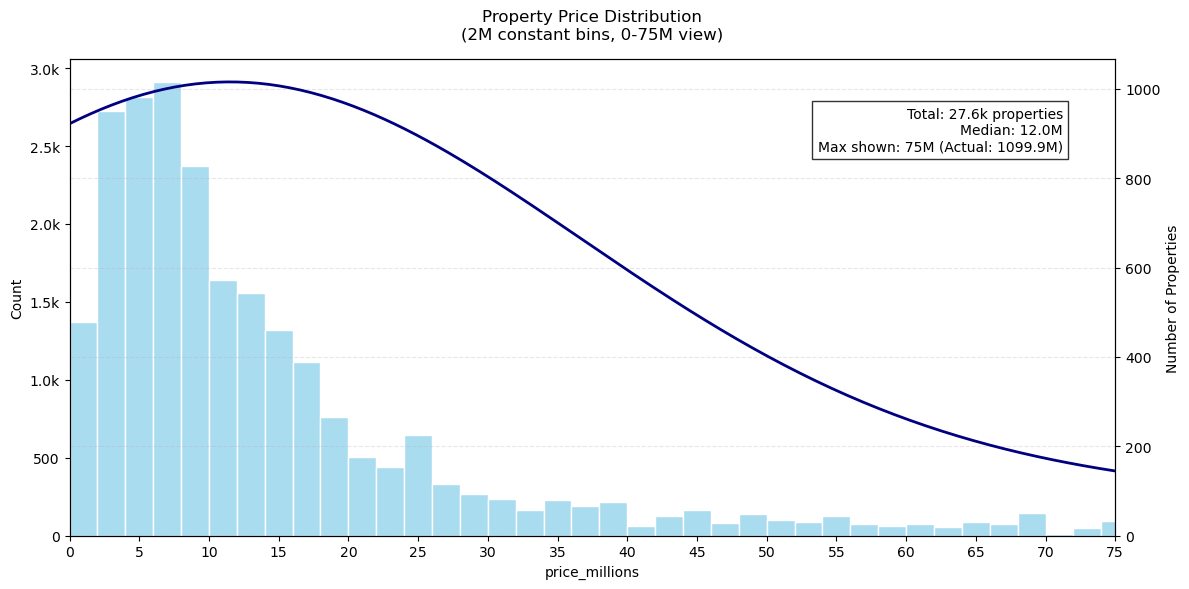

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))

# Convert prices to millions
df_new['price_millions'] = df_new['price'] / 1_000_000

# Set constant bin width (2M increments)
bin_width = 2
bins = np.arange(0, 75 + bin_width, bin_width)

# Plot histogram
hist = sns.histplot(df_new['price_millions'], bins=bins,
                   color='skyblue', alpha=0.7,
                   stat='count', edgecolor='white')

# Format y-axis with float k-values (e.g., 1.5k instead of 1500)
y_vals = hist.get_yticks()
hist.set_yticklabels([f'{y/1000:.1f}k' if y >= 1000 else f'{int(y)}' for y in y_vals])

# Plot properly scaled KDE line
ax2 = hist.twinx()
sns.kdeplot(df_new['price_millions'], color='navy',
           linewidth=2, bw_method=0.2,
           clip=(0, 75), ax=ax2)

# Calculate proper KDE scaling factor
hist_area = sum([p.get_height() * bin_width for p in hist.patches])
kde_area = np.trapz(ax2.lines[0].get_ydata(), ax2.lines[0].get_xdata())
scale_factor = hist_area / kde_area
ax2.lines[0].set_ydata(ax2.lines[0].get_ydata() * scale_factor)

# Match KDE y-axis to histogram scale
ax2.set_ylim(0, max(ax2.lines[0].get_ydata()) * 1.05)
ax2.set_ylabel('')  # Hide KDE y-axis label

# Format axes
plt.xlim(0, 75)
plt.xticks(np.arange(0, 76, 5))
plt.xlabel('Price (in millions USD)')
plt.ylabel('Number of Properties')

# Add annotations
plt.title(f'Property Price Distribution\n({bin_width}M constant bins, 0-75M view)', pad=15)
plt.text(0.95, 0.90, 
        f"Total: {len(df_new)/1000:.1f}k properties\n"
        f"Median: {df_new['price'].median()/1_000_000:.1f}M\n"
        f"Max shown: 75M (Actual: {df_new['price'].max()/1_000_000:.1f}M)",
        ha='right', va='top',
        transform=hist.transAxes,
        bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [253]:
transformations = {
            'electricity': {'есть': 'yes'},
            'bathroom': {'в доме': 'inside', 'на улице': 'outside'},
            'waterSupply': {'скважина': 'borehole', 'колодец': 'well', 'центральное': 'central'},
            'sewerage': {'септик': 'septik', 'центральная': 'central', 'станция биоочистки': 'bio', 'выгребная яма': 'cesspool'},
            'saleMethod': {'возможна ипотека': 'mortgage', 'реализация на торгах': 'auction', 'продажа доли': 'part'},
            'gas': {'по границе участка': 'border', 'в доме': 'inhouse'},
            'transportAccessibility': {'остановка общественного транспорта': 'bus', 'асфальтированная дорога': 'road', 'железнодорожная станция': 'railway'},
            'infrastructure': {'детский сад': 'kindergarden', 'магазин': 'shop', 'аптека': 'pharmacy', 'школа': 'school'},
            'parking': {'гараж': 'garage', 'парковочное место': 'slot'},
            'terrace': {'есть': 'yes'},
            'media': {'Wi-Fi': 'wifi', 'телевидение': 'tv'},
            'recreation': {'бассейн': 'pool', 'баня или сауна': 'sauna'},
            'heating': {'газовое': 'gas', 'электрическое': 'electric', 'центральное': 'central', 'камин': 'fireplace', 'печь': 'stove', 'жидкотопливный котёл': 'liquidFuelBoiler', 'другое': 'other'},
            'category': {'Дачи': 'dacha', 'Дома': 'house', 'Коттеджи': 'cottage'},
            'seller': {'Риелтор': 'rieltor', 'Агентство': 'agency', 'Частное лицо': 'owner'},
            'renovation': {'косметический': 'cosmetic', 'евро': 'evro', 'дизайнерский': 'design', 'требует ремонта': 'requested'},
            'landCategory': {'садовое некоммерческое товарищество (СНТ)': 'snt', 'фермерское хозяйство': 'farm', 'Личное подсобное хозяйство (ЛПХ)': 'lph', 'дачное некоммерческое партнёрство (ДНП)': 'dnp', 'индивидуальное жилищное строительство (ИЖС)': 'izhs'},
            'wallMaterial': {'бревно': 'log', 'экспериментальные материалы': 'experimental', 'пеноблоки': 'foamBlock', 'металл': 'metal', 'сэндвич-панели': 'sandwichPanel', 'газоблоки': 'gasBlock', 'кирпич': 'brick', 'железобетонные панели': 'concretePanel', 'брус': 'timber'},
        }

In [254]:
tmp_df = df_new.join(df.set_index('id')[['heating']])[['heating','price']]
tmp_df['heating']=tmp_df['heating'].map(transformations['heating'])

/var/folders/jx/6b32z0353499nszqlj5yc0xc0000gn/T/ipykernel_63063/4150556579.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_yticklabels([f'{y/1000:.1f}k' if y >= 1000 else f'{int(y)}' for y in y_vals])


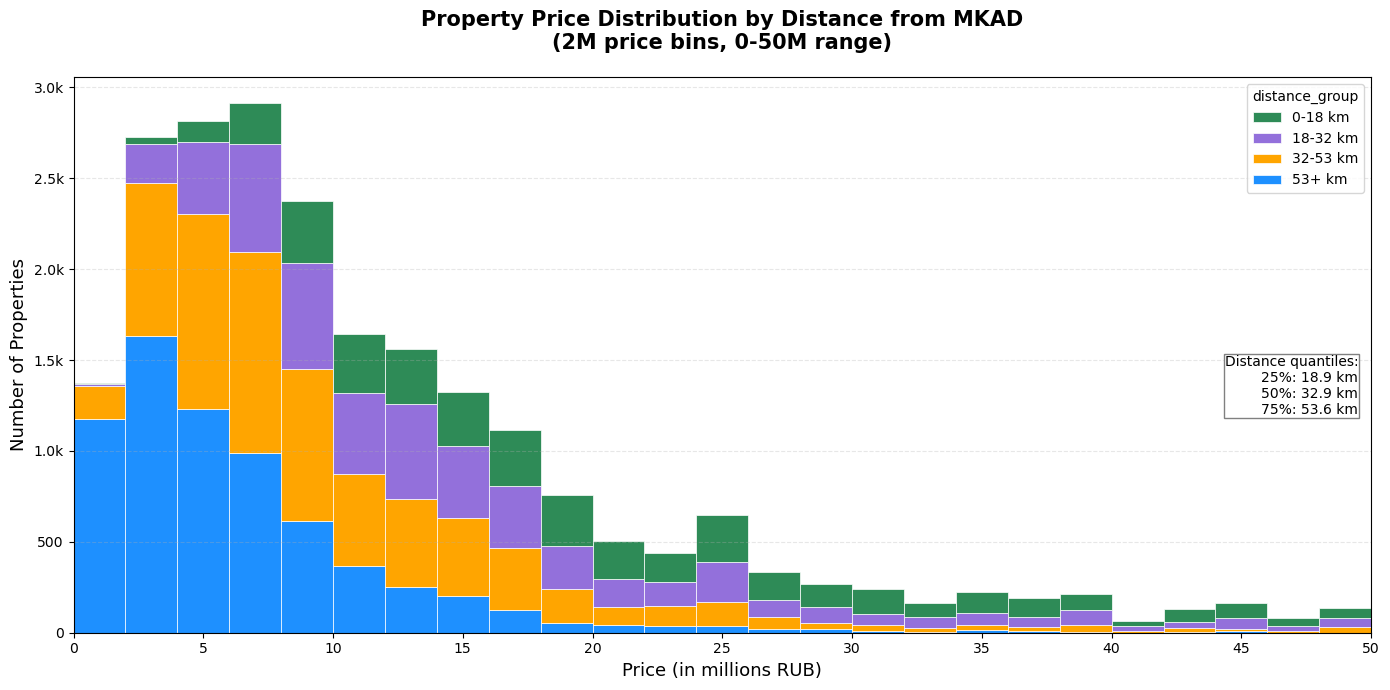

In [258]:
plt.figure(figsize=(14, 7))  # Increased figure size for better spacing

# Convert prices to millions
df_new['price_millions'] = df_new['price'] / 1_000_000

# Set constant bin width (2M increments)
bin_width = 2
price_bins = np.arange(0, 51 + bin_width, bin_width)

# Create distance groups based on quantiles
distance_bins = [
    df_new['distanceFromMkad'].min(),
    df_new['distanceFromMkad'].quantile(0.25),
    df_new['distanceFromMkad'].quantile(0.5),
    df_new['distanceFromMkad'].quantile(0.75),
    df_new['distanceFromMkad'].max()
]

distance_labels = [
    f"0-{int(distance_bins[1])} km",
    f"{int(distance_bins[1])}-{int(distance_bins[2])} km",
    f"{int(distance_bins[2])}-{int(distance_bins[3])} km",
    f"{int(distance_bins[3])}+ km"
]

df_new['distance_group'] = pd.cut(
    df_new['distanceFromMkad'],
    bins=distance_bins,
    labels=distance_labels,
    include_lowest=True
)

# Create high-contrast color palette
palette = [
    '#2E8B57',  # Green (SeaGreen)
    '#9370DB',  # Purple (MediumPurple)
    '#FFA500',  # Orange
    '#1E90FF',  # Blue (DodgerBlue)
    '#FF69B4',  # Pink (HotPink)
    '#FFD700',  # Yellow (Gold)
    '#808080',  # Grey
    '#00008B'   # DarkBlue
][:len(distance_labels)]

# Plot stacked histogram
hist = sns.histplot(data=df_new, x='price_millions', hue='distance_group',
                   bins=price_bins, multiple='stack',
                   hue_order=distance_labels,
                   palette=palette,
                   edgecolor='white', linewidth=0.5,
                   alpha=1.0)

# Format y-axis with float k-values
y_vals = hist.get_yticks()
hist.set_yticklabels([f'{y/1000:.1f}k' if y >= 1000 else f'{int(y)}' for y in y_vals])

# Format axes
plt.xlim(0, 50)
plt.xticks(np.arange(0, 51, 5))
plt.xlabel('Price (in millions RUB)', fontsize=13)
plt.ylabel('Number of Properties', fontsize=13)

# Add distance group labels on the right with increased spacing
# Add title and statistics
plt.title('Property Price Distribution by Distance from MKAD\n(2M price bins, 0-50M range)', 
         pad=20, fontsize=15, fontweight='bold')

# Add distance quantile information
plt.text(0.99, 0.50, 
        f"Distance quantiles:\n"
        f"25%: {distance_bins[1]:.1f} km\n"
        f"50%: {distance_bins[2]:.1f} km\n"
        f"75%: {distance_bins[3]:.1f} km",
        ha='right', va='top',
        transform=hist.transAxes,
        bbox=dict(facecolor='white', alpha=1.0, edgecolor='gray', pad=0.5))

plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

/var/folders/jx/6b32z0353499nszqlj5yc0xc0000gn/T/ipykernel_63063/2813982430.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_yticklabels([f'{y/1000:.1f}k' if y >= 1000 else f'{int(y)}' for y in y_vals])


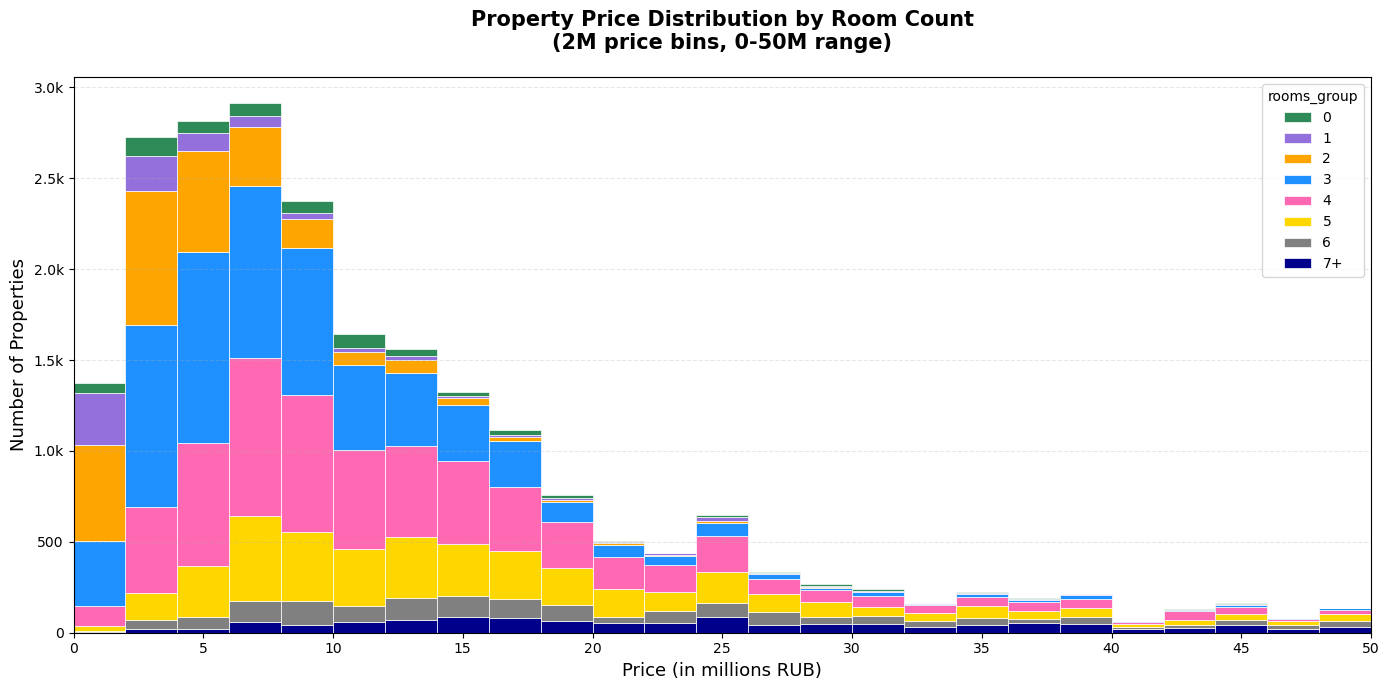

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 7))  # Increased figure size for better spacing

# Convert prices to millions
df_new['price_millions'] = df_new['price'] / 1_000_000

# Set constant bin width (2M increments)
bin_width = 2
bins = np.arange(0, 51 + bin_width, bin_width)

# Create room categories and sort them numerically
df_new['rooms_group'] = df_new['rooms'].apply(lambda x: str(int(x)) if x < 7 else '7+')
room_order = sorted(df_new['rooms_group'].unique(), key=lambda x: int(x.replace('+','')))

# Create high-contrast color palette (similar to reference image)

palette = [
    '#2E8B57',  # Green (SeaGreen)
    '#9370DB',  # Purple (MediumPurple)
    '#FFA500',  # Orange
    '#1E90FF',  # Blue (DodgerBlue)
    '#FF69B4',  # Pink (HotPink)
    '#FFD700',  # Yellow (Gold)
    '#808080',  # Grey
    '#00008B'   # DarkBlue
][:len(room_order)]

# Plot stacked histogram
hist = sns.histplot(data=df_new, x='price_millions', hue='rooms_group',
                   bins=bins, multiple='stack',
                   hue_order=room_order,
                   palette=palette,
                   edgecolor='white', linewidth=0.5,
                   alpha=1.0)  # No transparency

# Format y-axis with float k-values
y_vals = hist.get_yticks()
hist.set_yticklabels([f'{y/1000:.1f}k' if y >= 1000 else f'{int(y)}' for y in y_vals])

# Format axes
plt.xlim(0, 50)
plt.xticks(np.arange(0, 51, 5))
plt.xlabel('Price (in millions RUB)', fontsize=13)
plt.ylabel('Number of Properties', fontsize=13)

# Add title and statistics
plt.title('Property Price Distribution by Room Count\n(2M price bins, 0-50M range)', 
         pad=20, fontsize=15, fontweight='bold')  # Increased padding and font size
# plt.text(0.95, 0.90, 
#         f"Total properties: {len(df_new)/1000:.1f}k\n"
#         f"Median price: {df_new['price'].median()/1_000_000:.1f}M",
#         ha='right', va='top',
#         transform=hist.transAxes,
#         bbox=dict(facecolor='white', alpha=1.0, edgecolor='gray', pad=0.5))

plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

/var/folders/jx/6b32z0353499nszqlj5yc0xc0000gn/T/ipykernel_63063/3056181216.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_yticklabels([f'{y/1000:.1f}k' if y >= 1000 else f'{int(y)}' for y in y_vals])


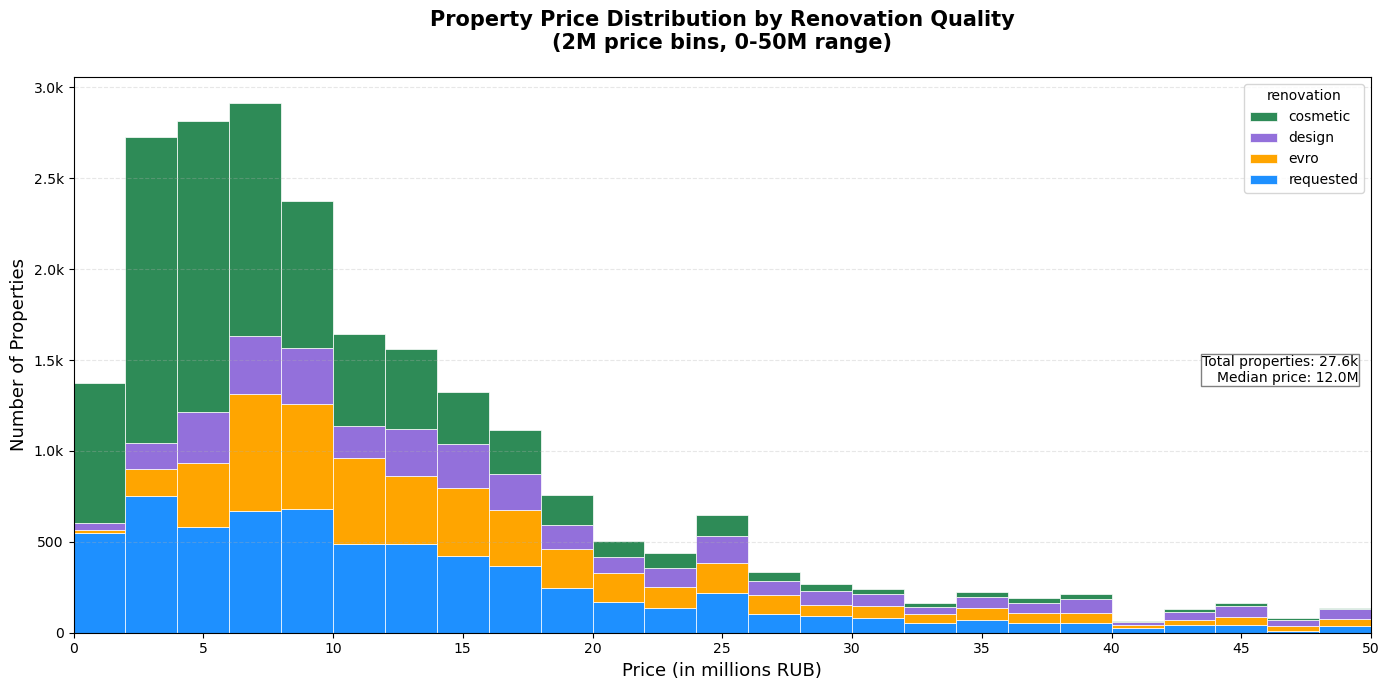

In [262]:
plt.figure(figsize=(14, 7))  # Increased figure size for better spacing

# Convert prices to millions
df_new['price_millions'] = df_new['price'] / 1_000_000

# Set constant bin width (2M increments)
bin_width = 2
bins = np.arange(0, 51 + bin_width, bin_width)

# Get unique renovation categories and sort them (customize order if needed)
renovation_order = sorted(df_new['renovation'].unique())
# Or define a specific order:
# renovation_order = ['excellent', 'good', 'satisfactory', 'needs renovation']

# Create high-contrast color palette
palette = [
    '#2E8B57',  # Green (SeaGreen)
    '#9370DB',  # Purple (MediumPurple)
    '#FFA500',  # Orange
    '#1E90FF',  # Blue (DodgerBlue)
    '#FF69B4',  # Pink (HotPink)
    '#FFD700',  # Yellow (Gold)
    '#808080',  # Grey
][:len(renovation_order)]

# Plot stacked histogram without default legend
hist = sns.histplot(data=df_new, x='price_millions', hue='renovation',
                   bins=bins, multiple='stack',
                   hue_order=renovation_order,
                   palette=palette,
                   edgecolor='white', linewidth=0.5,
                   alpha=1.0,
                   legend=True)  

# Format y-axis with float k-values
y_vals = hist.get_yticks()
hist.set_yticklabels([f'{y/1000:.1f}k' if y >= 1000 else f'{int(y)}' for y in y_vals])

# Format axes
plt.xlim(0, 50)
plt.xticks(np.arange(0, 51, 5))
plt.xlabel('Price (in millions RUB)', fontsize=13)
plt.ylabel('Number of Properties', fontsize=13)

# Add title and statistics
plt.title('Property Price Distribution by Renovation Quality\n(2M price bins, 0-50M range)', 
         pad=20, fontsize=15, fontweight='bold')

# Add summary statistics
plt.text(0.99, 0.5, 
        f"Total properties: {len(df_new)/1000:.1f}k\n"
        f"Median price: {df_new['price'].median()/1_000_000:.1f}M",
        ha='right', va='top',
        transform=hist.transAxes,
        bbox=dict(facecolor='white', alpha=1.0, edgecolor='gray', pad=0.5))

plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

/var/folders/jx/6b32z0353499nszqlj5yc0xc0000gn/T/ipykernel_63063/245340406.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_yticklabels([f'{y/1000:.1f}k' if y >= 1000 else f'{int(y)}' for y in y_vals])


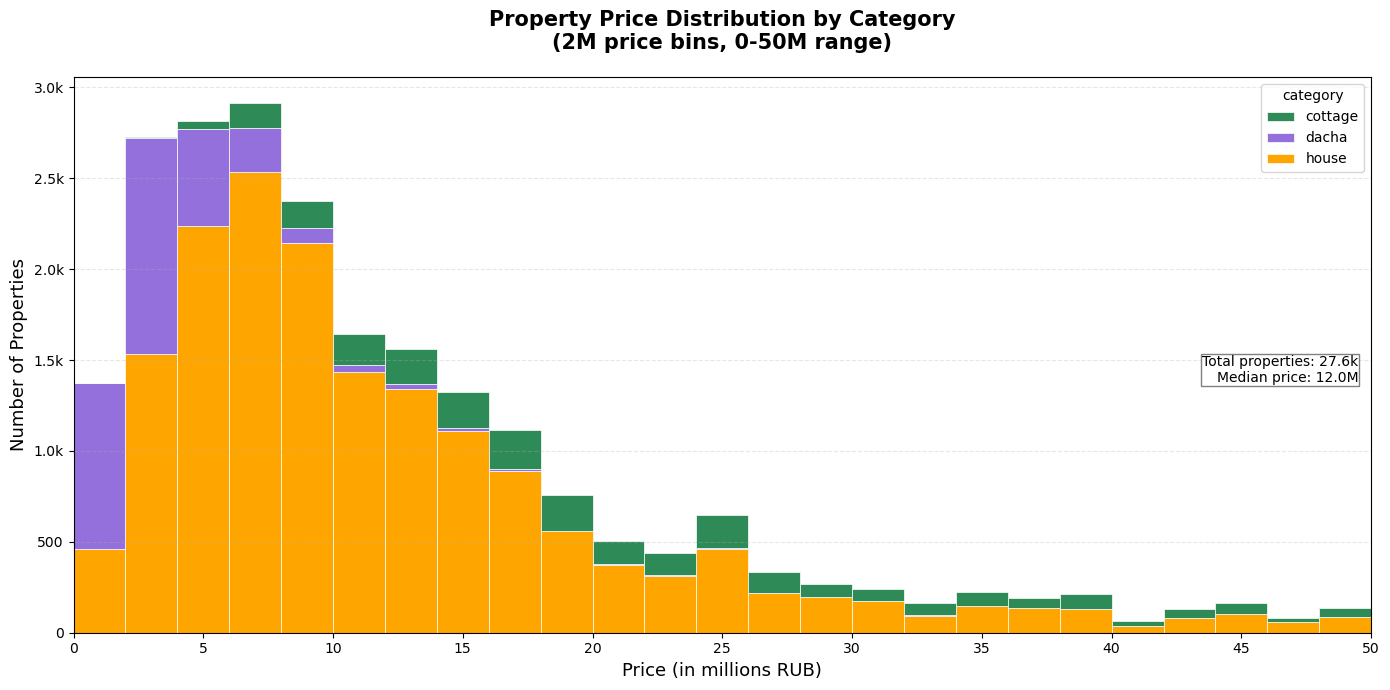

In [265]:
plt.figure(figsize=(14, 7))  # Increased figure size for better spacing

# Convert prices to millions
df_new['price_millions'] = df_new['price'] / 1_000_000

# Set constant bin width (2M increments)
bin_width = 2
bins = np.arange(0, 51 + bin_width, bin_width)

# Get unique categories and sort them (alphabetically or by custom order if needed)
categories = df_new['category'].unique()
# If you have a specific order you want, define it here:
# category_order = ['category1', 'category2', 'category3'] 
category_order = sorted(categories)  # Default alphabetical sorting

# Create high-contrast color palette
palette = [
    '#2E8B57',  # Green (SeaGreen)
    '#9370DB',  # Purple (MediumPurple)
    '#FFA500',  # Orange
    '#1E90FF',  # Blue (DodgerBlue)
    '#FF69B4',  # Pink (HotPink)
    '#FFD700',  # Yellow (Gold)
    '#808080',  # Grey
    '#00008B',  # DarkBlue
    '#FF6347',  # Tomato
    '#40E0D0'   # Turquoise
][:len(category_order)]

# Plot stacked histogram
hist = sns.histplot(data=df_new, x='price_millions', hue='category',
                   bins=bins, multiple='stack',
                   hue_order=category_order,
                   palette=palette,
                   edgecolor='white', linewidth=0.5,
                   alpha=1.0)

# Format y-axis with float k-values
y_vals = hist.get_yticks()
hist.set_yticklabels([f'{y/1000:.1f}k' if y >= 1000 else f'{int(y)}' for y in y_vals])

# Format axes
plt.xlim(0, 50)
plt.xticks(np.arange(0, 51, 5))
plt.xlabel('Price (in millions RUB)', fontsize=13)
plt.ylabel('Number of Properties', fontsize=13)

# 
# Add title and statistics
plt.title('Property Price Distribution by Category\n(2M price bins, 0-50M range)', 
         pad=20, fontsize=15, fontweight='bold')

# Add summary statistics if desired
plt.text(0.99, 0.50, 
        f"Total properties: {len(df_new)/1000:.1f}k\n"
        f"Median price: {df_new['price'].median()/1_000_000:.1f}M",
        ha='right', va='top',
        transform=hist.transAxes,
        bbox=dict(facecolor='white', alpha=1.0, edgecolor='gray', pad=0.5))

plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [267]:
from scipy import stats

# Perform D'Agostino-Pearson test
statistic, p_value = stats.normaltest(df_new['price'])

print("D'Agostino-Pearson Omnibus Normality Test Results:")
print(f"Test Statistic: {statistic:.3f}")
print(f"P-value: {p_value:.e}")  # Scientific notation for small p-values

# Interpret results
alpha = 0.05
if p_value > alpha:
    print("Fail to reject null hypothesis: Data appears normally distributed")
else:
    print("Reject null hypothesis: Data does NOT appear normally distributed")

D'Agostino-Pearson Omnibus Normality Test Results:
Test Statistic: 24724.620


ValueError: Format specifier missing precision

/var/folders/jx/6b32z0353499nszqlj5yc0xc0000gn/T/ipykernel_40184/1024210204.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([f'{y/1000:.1f}k' if y >= 1000 else f'{int(y)}' for y in y_vals], fontsize=12)
/var/folders/jx/6b32z0353499nszqlj5yc0xc0000gn/T/ipykernel_40184/1024210204.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([f'{y/1000:.1f}k' if y >= 1000 else f'{int(y)}' for y in y_vals], fontsize=12)


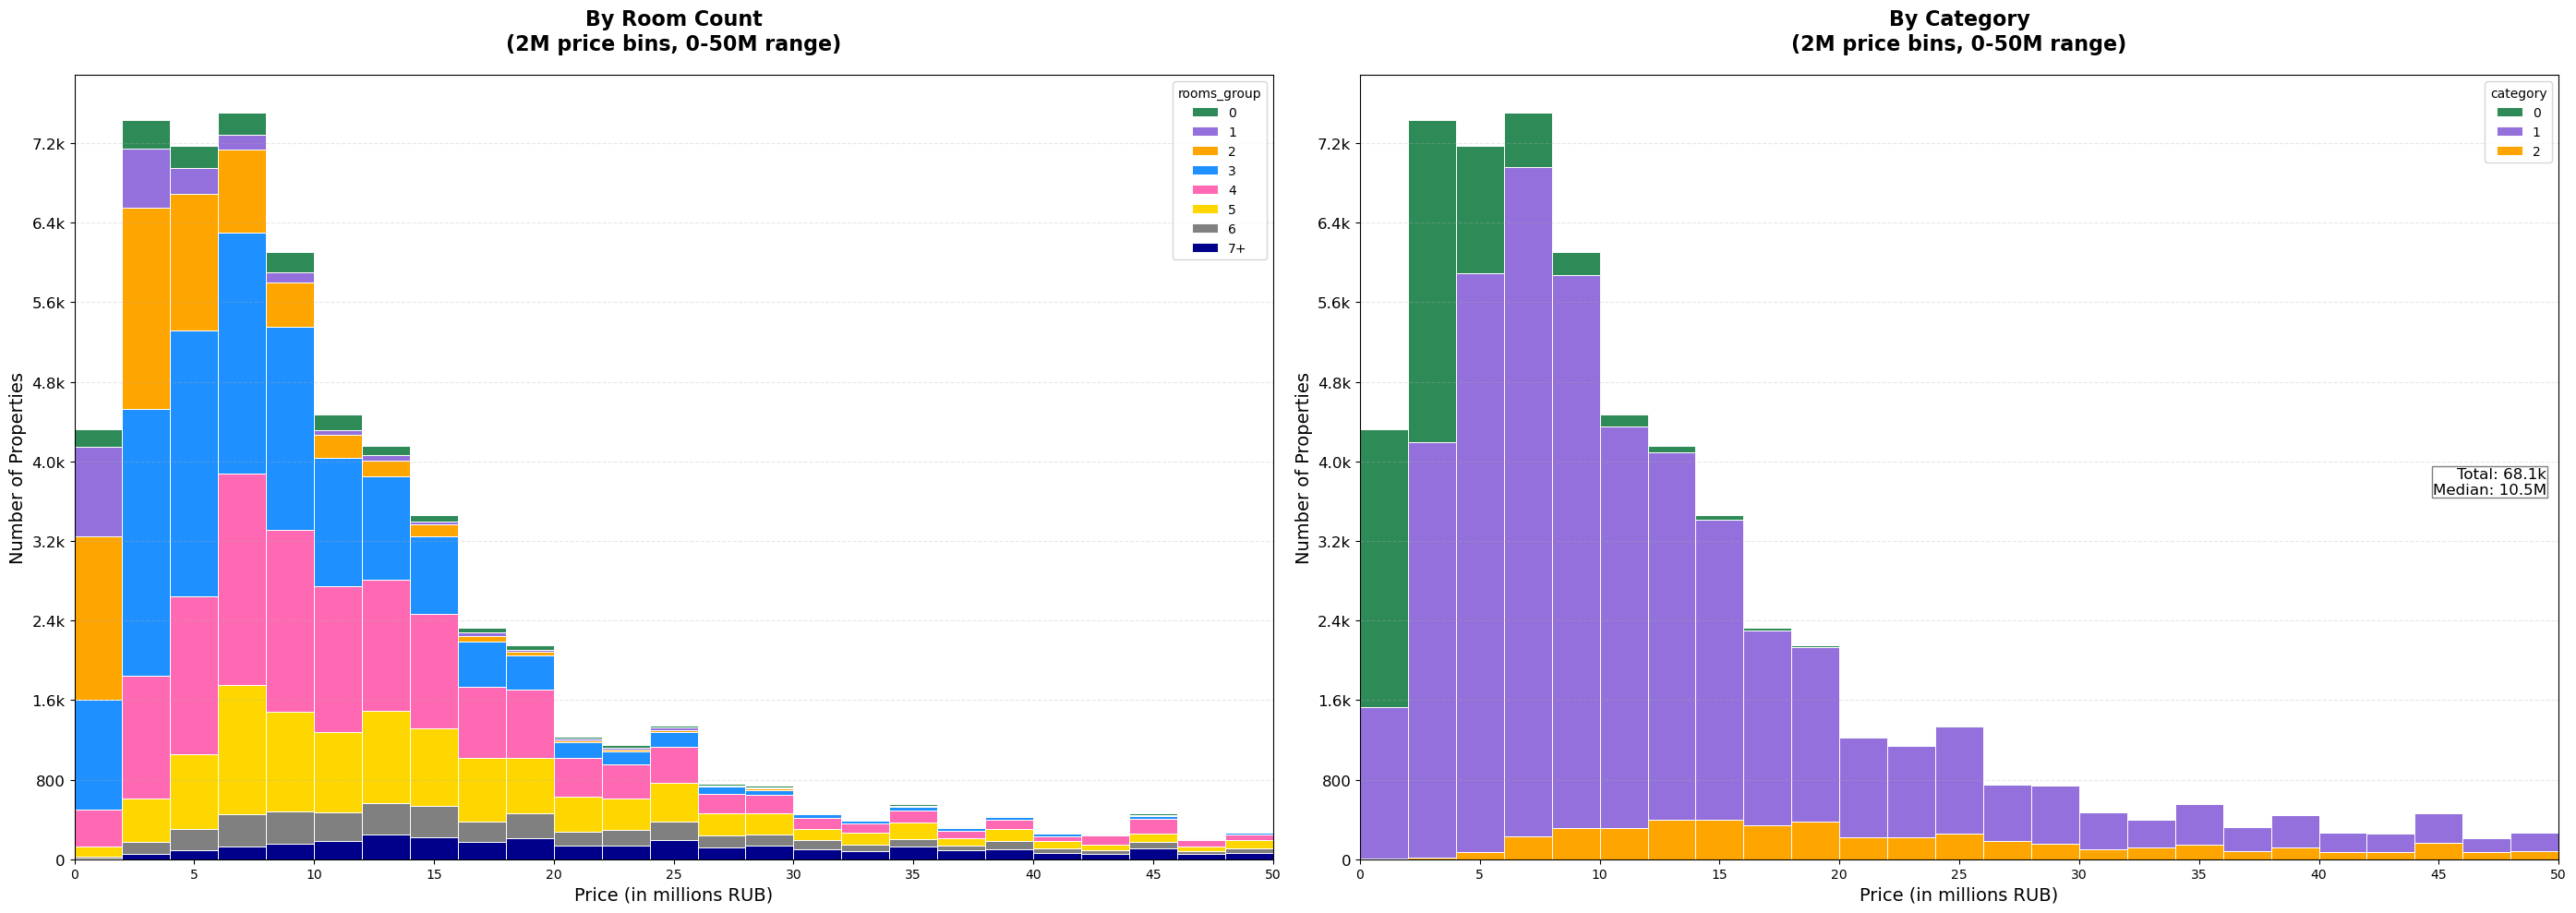

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the figure with larger dimensions
fig, axes = plt.subplots(1, 2, figsize=(28, 10))
plt.subplots_adjust(wspace=0.4)

# Convert prices to millions
df_new['price_millions'] = df_new['price'] / 1_000_000
bin_width = 2
bins = np.arange(0, 51 + bin_width, bin_width)

# Common settings for all plots
common_kwargs = {
    'bins': bins,
    'multiple': 'stack',
    'edgecolor': 'white',
    'linewidth': 0.7,
    'alpha': 1.0
}

# --------------------------
# Subplot 1: By Room Count
# --------------------------
ax1 = axes[0]
df_new['rooms_group'] = df_new['rooms'].apply(lambda x: str(int(x)) if x < 7 else '7+')
room_order = sorted(df_new['rooms_group'].unique(), key=lambda x: int(x.replace('+','')))

palette1 = [
    '#2E8B57', '#9370DB', '#FFA500', '#1E90FF', 
    '#FF69B4', '#FFD700', '#808080', '#00008B'
][:len(room_order)]

sns.histplot(
    data=df_new, 
    x='price_millions', 
    hue='rooms_group',
    hue_order=room_order,
    palette=palette1,
    ax=ax1,
    **common_kwargs
)

ax1.set_xlim(0, 50)
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_xlabel('Price (in millions RUB)', fontsize=14)
ax1.set_ylabel('Number of Properties', fontsize=14)
ax1.set_title('By Room Count\n(2M price bins, 0-50M range)', 
             pad=20, fontsize=16, fontweight='bold')
ax1.grid(True, linestyle='--', alpha=0.3, axis='y')

# Fix y-axis tick labels
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
y_vals = ax1.get_yticks()
ax1.set_yticklabels([f'{y/1000:.1f}k' if y >= 1000 else f'{int(y)}' for y in y_vals], fontsize=12)

# --------------------------
# Subplot 2: By Category
# --------------------------
ax2 = axes[1]
category_order = sorted(df_new['category'].unique())

palette2 = [
    '#2E8B57', '#9370DB', '#FFA500', '#1E90FF', 
    '#FF69B4', '#FFD700', '#808080', '#00008B',
    '#FF6347', '#40E0D0'
][:len(category_order)]

sns.histplot(
    data=df_new, 
    x='price_millions', 
    hue='category',
    hue_order=category_order,
    palette=palette2,
    ax=ax2,
    **common_kwargs
)

ax2.set_xlim(0, 50)
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_xlabel('Price (in millions RUB)', fontsize=14)
ax2.set_ylabel('Number of Properties', fontsize=14)
ax2.set_title('By Category\n(2M price bins, 0-50M range)', 
             pad=20, fontsize=16, fontweight='bold')
ax2.grid(True, linestyle='--', alpha=0.3, axis='y')

# Fix y-axis tick labels
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
y_vals = ax2.get_yticks()
ax2.set_yticklabels([f'{y/1000:.1f}k' if y >= 1000 else f'{int(y)}' for y in y_vals], fontsize=12)

# Add statistics using a dictionary for bbox properties
bbox_props = {
    'facecolor': 'white',
    'alpha': 1.0,
    'edgecolor': 'gray',
    'pad': 0.5
}

ax2.text(0.99, 0.5, 
        f"Total: {len(df_new)/1000:.1f}k\n"
        f"Median: {df_new['price'].median()/1_000_000:.1f}M",
        ha='right', va='top',
        transform=ax2.transAxes,
        bbox=bbox_props,
        fontsize=12)

# Adjust layout and save
plt.tight_layout()
plt.savefig('property_price_distribution_horizontal.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

In [270]:
df_new = df_new.drop(columns={'saleMethod_auction', 'saleMethod_part'})
print(len(df_new.columns))

49


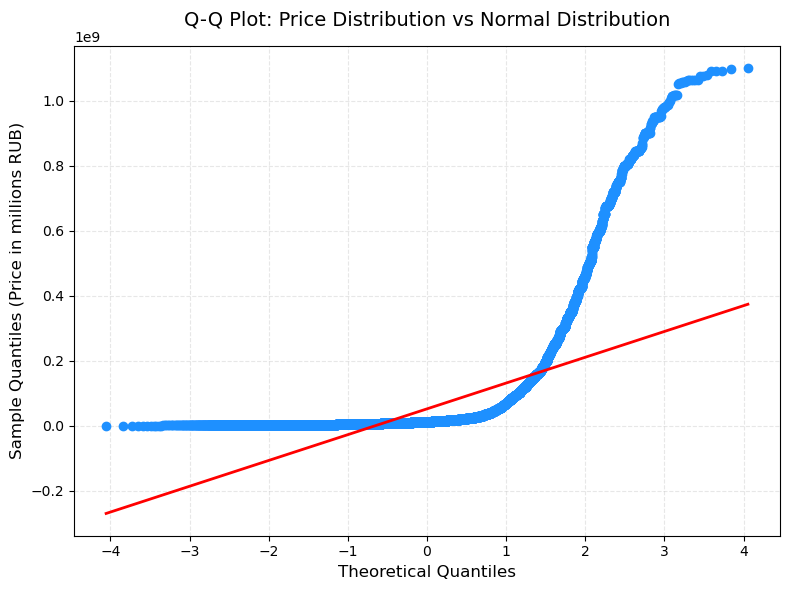

In [271]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Create Q-Q plot
stats.probplot(df_new['price'], plot=plt)

# Formatting
plt.title('Q-Q Plot: Price Distribution vs Normal Distribution', pad=15, fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles (Price in millions RUB)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Add reference line
plt.gca().get_lines()[0].set_markerfacecolor('#1E90FF')
plt.gca().get_lines()[0].set_markeredgecolor('#1E90FF')
plt.gca().get_lines()[1].set_color('red')
plt.gca().get_lines()[1].set_linewidth(2)

plt.tight_layout()
plt.show()

### Geo data visualization

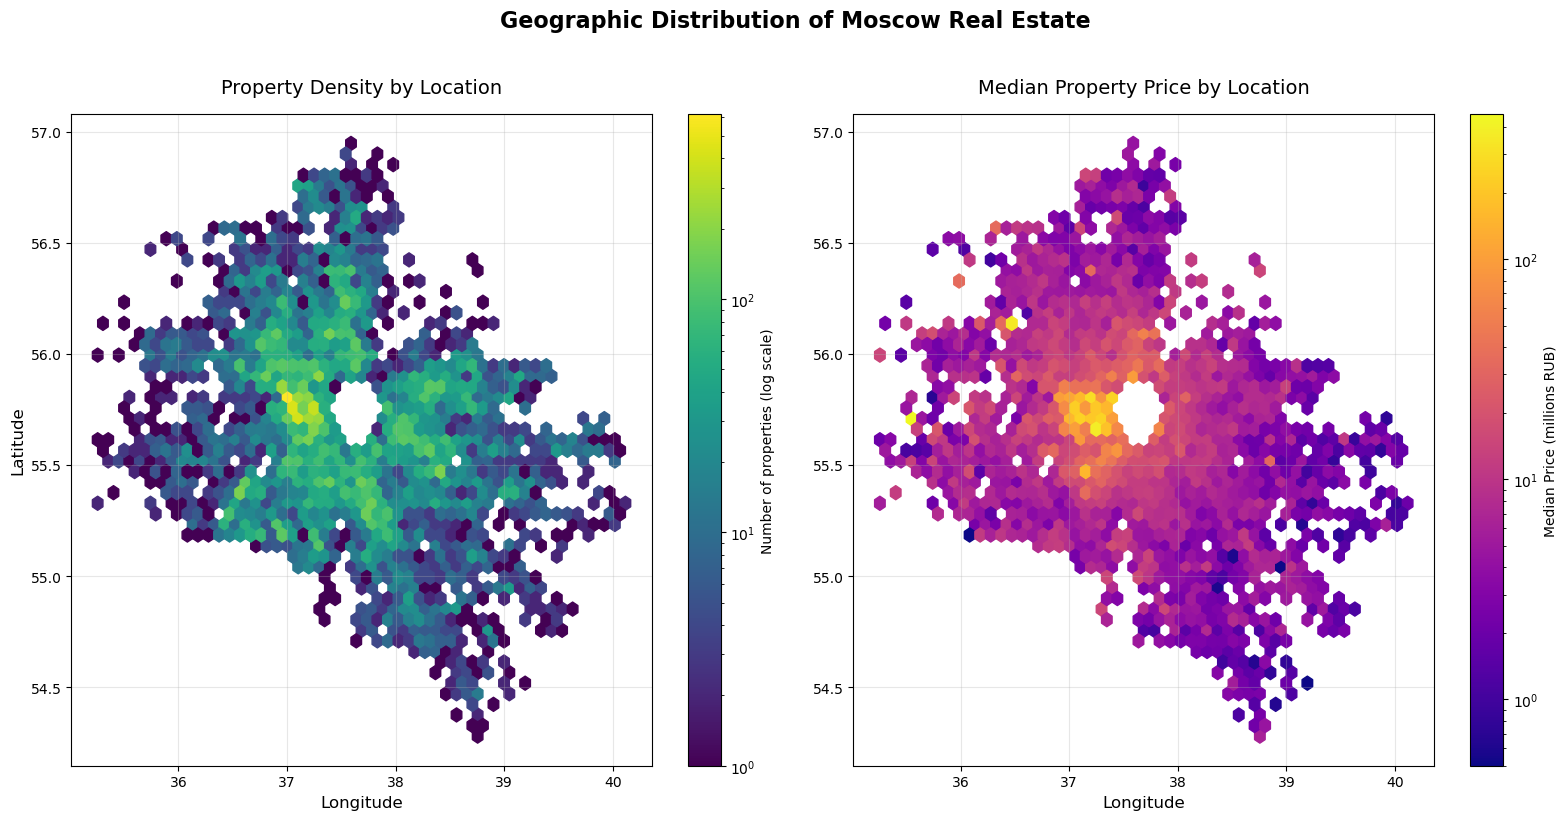

In [275]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(16, 8))

# --- Subplot 1: Point Density ---
plt.subplot(1, 2, 1)
hb1 = plt.hexbin(
    x=df_new['longitude'],
    y=df_new['latitude'],
    gridsize=50,
    cmap='viridis',
    bins='log',  # Log scale for better contrast
    mincnt=1
)
cb1 = plt.colorbar(hb1, label='Number of properties (log scale)')
plt.title('Property Density by Location', pad=15, fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, alpha=0.3)

# --- Subplot 2: Price Distribution ---
plt.subplot(1, 2, 2)
hb2 = plt.hexbin(
    x=df_new['longitude'],
    y=df_new['latitude'],
    C=df_new['price']/1_000_000,  # Color by price in millions
    reduce_C_function=np.median,  # Show median price per hex
    gridsize=50,
    cmap='plasma',
    bins='log'
)
cb2 = plt.colorbar(hb2, label='Median Price (millions RUB)')
plt.title('Median Property Price by Location', pad=15, fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.grid(True, alpha=0.3)

# --- Common Settings ---
plt.suptitle('Geographic Distribution of Moscow Real Estate', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Word clouds

In [129]:
from preprocessor_text import TextPreprocessor
df_raw = pd.read_csv(r'df_lognorm.csv').set_index('id')[['price']]
texts = pd.read_csv(r'raw_data_parsed.csv').set_index('id')[['description']]
texts = texts.TextPreprocessor()
df = texts.join(df_raw)
df=df[(df.description.notnull()) & (df.price.notnull())]

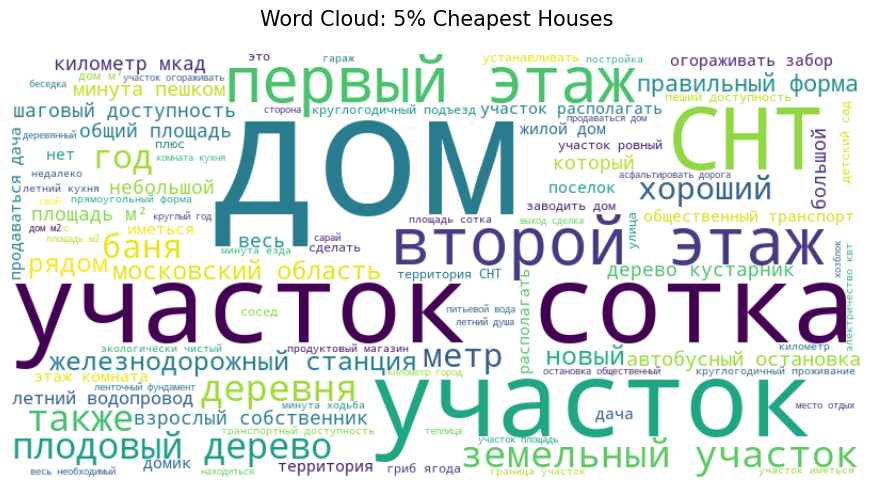

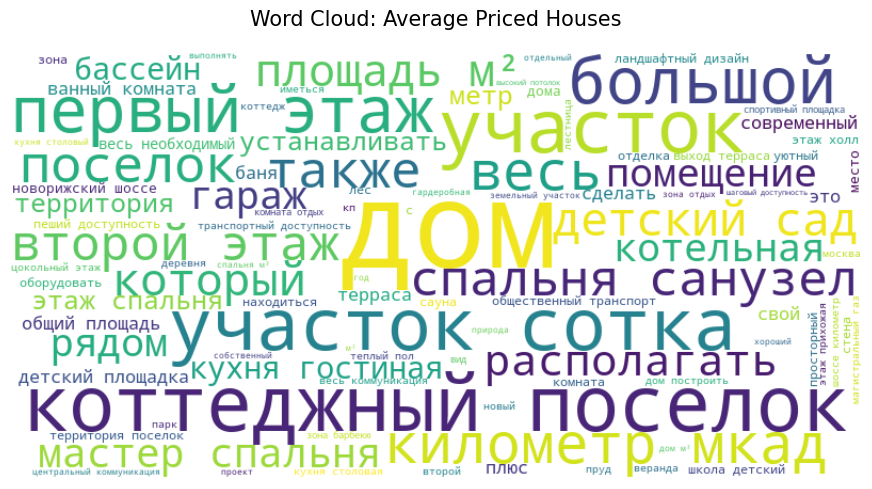

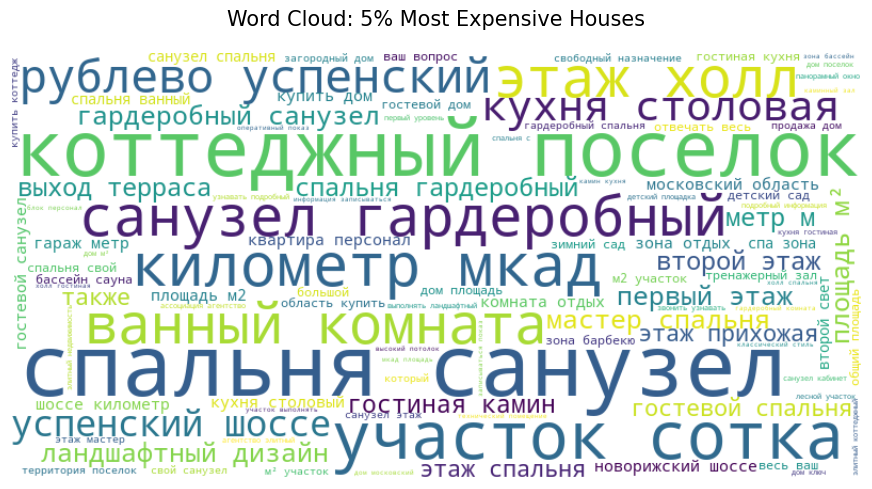

In [139]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def generate_wordcloud(text, title):
    """Generate and display a word cloud from text"""
    wordcloud = WordCloud(width=800, 
                         height=400,
                         background_color='white',
                         colormap='viridis',
                         max_words=100).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Calculate price thresholds
price_5_percent = df['price'].quantile(0.10)
price_95_percent = df['price'].quantile(0.90)
price_mean = df['price'].mean()

# Filter data
cheapest = df[df['price'] <= price_5_percent]
expensive = df[df['price'] >= price_95_percent]
average = df[(df['price'] > price_mean * 0.9) & (df['price'] < price_mean * 1.1)]

# Combine all descriptions for each segment
cheapest_text = ' '.join(cheapest['description'].dropna())
expensive_text = ' '.join(expensive['description'].dropna())
average_text = ' '.join(average['description'].dropna())

# Generate word clouds
generate_wordcloud(cheapest_text, 'Word Cloud: 5% Cheapest Houses')
generate_wordcloud(average_text, 'Word Cloud: Average Priced Houses') 
generate_wordcloud(expensive_text, 'Word Cloud: 5% Most Expensive Houses')

In [74]:
# gate renew
# [Grid 13/28] Testing params: {'gate_epochs': 20, 'gate_lr': 0.0001, 'gate_mode': 'hard', 'l1_reg': 1e-06, 'use_gate': True}
# Mean orig_r2: 0.8232

# [Grid 7/28] Testing params: {'gate_epochs': 20, 'gate_lr': 0.0005, 'gate_mode': 'adaptive', 'l1_reg': 1e-06, 'use_gate': True}
# Mean orig_r2: 0.8157
# [Grid 9/28] Testing params: {'gate_epochs': 20, 'gate_lr': 0.0005, 'gate_mode': 'soft', 'l1_reg': 1e-05, 'use_gate': True}
# Mean orig_r2: 0.8165
# [Grid 17/28] Testing params: {'gate_epochs': 20, 'gate_lr': 0.0001, 'gate_mode': 'soft', 'l1_reg': 5e-05, 'use_gate': True}
# Mean orig_r2: 0.8199
# [Grid 25/28] Testing params: {'gate_epochs': 20, 'gate_lr': 5e-05, 'gate_mode': 'adaptive', 'l1_reg': 1e-06, 'use_gate': True}
# Mean orig_r2: 0.8190

from scipy import stats

# R² scores (5-fold)
without_gate = [0.7748, 0.8467, 0.8281, 0.8236, 0.8008] # base
with_gate    = [0.7868, 0.8525, 0.8217, 0.8455, 0.8093] # gate

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(without_gate, with_gate)

print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

t-statistic: -1.8221, p-value: 0.1425


In [72]:
# gate old
# [Grid 17/28] Testing params: {'gate_epochs': 20, 'gate_lr': 0.0001, 'gate_mode': 'soft', 'l1_reg': 5e-05, 'use_gate': True}


from scipy import stats

# R² scores (5-fold)
without_gate = [0.8288, 0.7719, 0.8089, 0.8262, 0.7647]
with_gate    = [0.8340, 0.8114, 0.8279, 0.8457, 0.7783]

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(without_gate, with_gate)

print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

t-statistic: -3.4239, p-value: 0.0267
